In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
#import datetime
import time
#import math
sns.set_style("whitegrid")

#### Read raw IP21 data from file

In [8]:
start_time = time.time()
df = pd.read_pickle('rawdata.pkl')
elapsed_time = time.time() - start_time
print('Total loading time from pickle: %5.1f seconds.' % elapsed_time)
df.describe()

Total loading time from pickle:   0.0 seconds.


,POARFQCA-17901:me,POARAIA-17903_1a:av,POARAIA-17903_3a:av,POARTC-17902:me,POARAIA-17903_2ab:av,POARTI-17912:av,POARFCA-17907:me,POARTC-17923:me,POARTCA-17931:me,POARFIA-17904:av,...,POARFCA-17912:me,POARTCA-17929:me,POARFCA-17219:me,POARPCA-17917:me,POARFC-17918:me,POARFC-17916:me,POARTI-17935:av,POARTI-17934:av,POARTI-17933:av,POARTI-17932:av
count,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,...,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000,26736.000000
mean,23.010685,67.915954,64.294978,93.073444,20.108841,100.397163,3.285478,81.688544,190.765273,128.180018,...,12.203577,57.462887,16.318440,-63.244320,1.212554,1.636114,201.591818,179.592884,180.891399,165.093208
std,5.871641,11.634671,11.724886,14.654456,39.546586,17.285560,1.164531,15.879816,41.893754,26.553728,...,3.755242,12.875015,4.375278,9.169094,0.470674,1.051786,35.214811,32.317804,30.913814,29.913502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-119.374034,0.000000,...,0.000000,0.000000,0.000000,-73.811956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.608635,67.816706,63.639448,94.511484,0.000000,102.746878,2.999511,81.522653,198.933143,126.322073,...,12.601013,56.624326,16.566836,-65.028723,1.053951,0.921859,204.509568,182.500329,183.453036,165.119523
50%,24.744399,69.967310,66.985856,94.998796,0.000000,103.540909,3.100147,82.057090,199.594859,136.692459,...,13.121773,57.166798,17.764347,-64.979857,1.351835,1.780157,207.334520,184.820878,185.823818,168.066108
75%,25.931830,72.081811,69.737235,95.399721,0.000000,104.426230,3.201179,88.001406,200.108805,140.742021,...,13.749415,59.094554,18.267971,-62.975541,1.530697,2.026500,212.689959,189.603376,190.227423,176.581823
max,29.125196,102.853374,80.465333,150.000000,100.000000,157.061043,10.000000,140.818283,213.144415,175.000000,...,16.002910,180.174850,21.892626,243.756767,2.355405,5.000000,218.230652,200.000000,207.976967,200.000000


In [9]:
df.head()
#df.tail()

,POARFQCA-17901:me,POARAIA-17903_1a:av,POARAIA-17903_3a:av,POARTC-17902:me,POARAIA-17903_2ab:av,POARTI-17912:av,POARFCA-17907:me,POARTC-17923:me,POARTCA-17931:me,POARFIA-17904:av,...,POARFCA-17912:me,POARTCA-17929:me,POARFCA-17219:me,POARPCA-17917:me,POARFC-17918:me,POARFC-17916:me,POARTI-17935:av,POARTI-17934:av,POARTI-17933:av,POARTI-17932:av
TS_START,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-01 01:00:00,23.460580,69.056442,66.320721,95.003704,0.0,103.393562,2.850233,87.011311,200.194359,123.817169,...,12.048162,56.779453,16.727362,-65.015266,1.694142,4.999998,211.401947,189.283836,189.727104,174.701607
2014-01-01 02:00:00,23.454758,69.068302,66.307987,95.004967,0.0,103.372036,2.849802,86.985321,200.223358,123.819370,...,12.042025,56.764019,16.721216,-64.990143,1.692098,5.000000,211.420364,189.333412,189.779747,174.799278
2014-01-01 03:00:00,23.451626,69.080772,66.506809,95.007420,0.0,103.333496,2.850607,87.008194,200.222923,123.886589,...,12.036178,56.724716,16.718461,-64.995708,1.690016,4.999700,211.318184,189.272148,189.711227,174.662239
2014-01-01 04:00:00,23.445413,69.099819,66.760712,94.995850,0.0,103.359844,2.850255,87.022064,200.195770,123.614956,...,12.052841,56.742311,16.738780,-65.059814,1.693024,4.999628,211.345436,189.246712,189.695969,174.610161


#### Create filter for steady state
* POARFQCA-17901:me (C6-feed t/h) * POARAIA-17903_1a:av (DA901 Feed C6H6 p-%) >= 15t/h

In [10]:
df_filter = pd.DataFrame()
df['BzFeed'] = df['POARFQCA-17901:me']*df['POARAIA-17903_1a:av']/100
df_filter['Filter_BzFeed_gt15'] = df['BzFeed']>=14.95
print(df_filter['Filter_BzFeed_gt15'].describe())

count     26736
unique        2
top        True
freq      22699
Name: Filter_BzFeed_gt15, dtype: object


In [11]:
def HeuristicSteadyStateFilter(df, tolerance = 1, fL = 0.8, fH = 0.2):
    xLt0 = 0 #df.iat[0,0]
    xHt0 = 0 #df.iat[0,0]
    f = []
    for row in df.itertuples():
        xLt1 = fL*row[1]+(1-fL)*xLt0
        xHt1 = fH*row[1]+(1-fH)*xHt0
        if (abs(xHt1-xLt1)<=tolerance):
            f.append([row[0],True,xLt1,xHt1])
        else:
            f.append([row[0],False,xLt1,xHt1])
        xLt0 = xLt1
        xHt0 = xHt1
    df_f = pd.DataFrame([x[1:] for x in f],columns=['filter','xLt','xHt'],index=[x[0] for x in f])
    return df_f

In [19]:
df_filter['HeuristicSS'] = HeuristicSteadyStateFilter(df[['BzFeed','POARAIA-17903_1a:av']])['filter']
print(df_filter['HeuristicSS'].describe())
df_filter[df_filter['HeuristicSS']==False]
df_filter['Filter_Global'] = df_filter['HeuristicSS'] & df_filter['Filter_BzFeed_gt15']
df_filter['Filter_Global'].describe()

count     26736
unique        2
top        True
freq      26358
Name: HeuristicSS, dtype: object


count     26736
unique        2
top        True
freq      22593
Name: Filter_Global, dtype: object

#### Plot timeseries
* a timeplot with associated histogram is plotted for each tag.
* the red line represents the mean of the data ignoring the zero-values.
* the green area represents the steady state production as definied by the filter above. red is non steady-state.

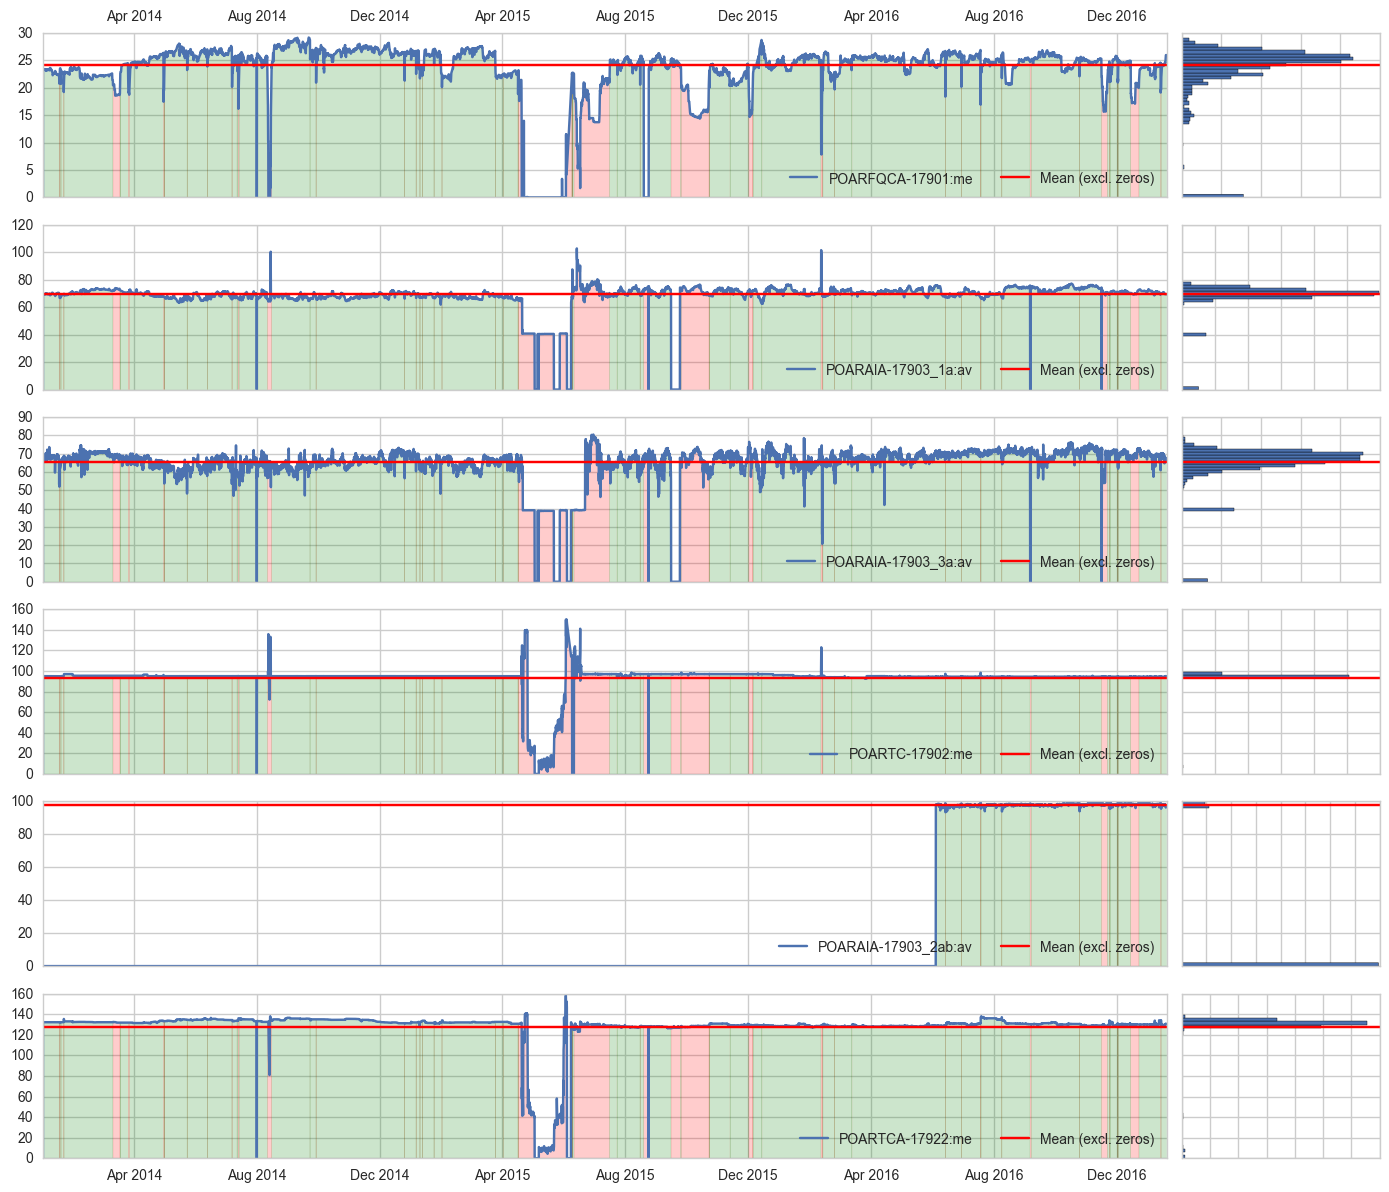

In [13]:
def plottimeseries(df,df_filter):
    numSubPlots = len(df.columns)
    f, axarr = plt.subplots(nrows=numSubPlots, ncols=2, figsize=(14,numSubPlots*2), gridspec_kw = {'width_ratios':[17, 3]})
    for i, tag in enumerate(df.columns):
        axarr[i,0].plot(df.index, df[tag])
        axarr[i,0].axhline(y = df[tag][df[tag]!=0].mean(), color = 'r',label='Mean (excl. zeros)')
        axarr[i,0].fill_between(df.index,y1=axarr[i,0].get_ylim()[0],y2=df[tag],where=df_filter==False,color='r',alpha=0.2)
        axarr[i,0].fill_between(df.index,y1=axarr[i,0].get_ylim()[0],y2=df[tag],where=df_filter==True,color='g',alpha=0.2)
        axarr[i,0].legend(loc='lower right',ncol=2)
        if (i!=numSubPlots-1 and i!=0):
            axarr[i,0].xaxis.set_ticklabels([])
        if i==0:
            axarr[i,0].xaxis.tick_top()
        axarr[i,1].hist(df[tag],bins=50,normed=True,orientation='horizontal')
        axarr[i,1].axhline(y = df[tag][df[tag]!=0].mean(), color = 'r',label='Mean (excl. zeros)')
        axarr[i,1].xaxis.set_ticklabels([])
        axarr[i,1].yaxis.set_ticklabels([])
    plt.tight_layout()
        
plottimeseries(df[[0,1,2,3,4,10]],df_filter['Filter_Global'])

#### Plotting a heatmap of correlations
* for the first 20 variables the Pearson correlation coefficient is plotted.

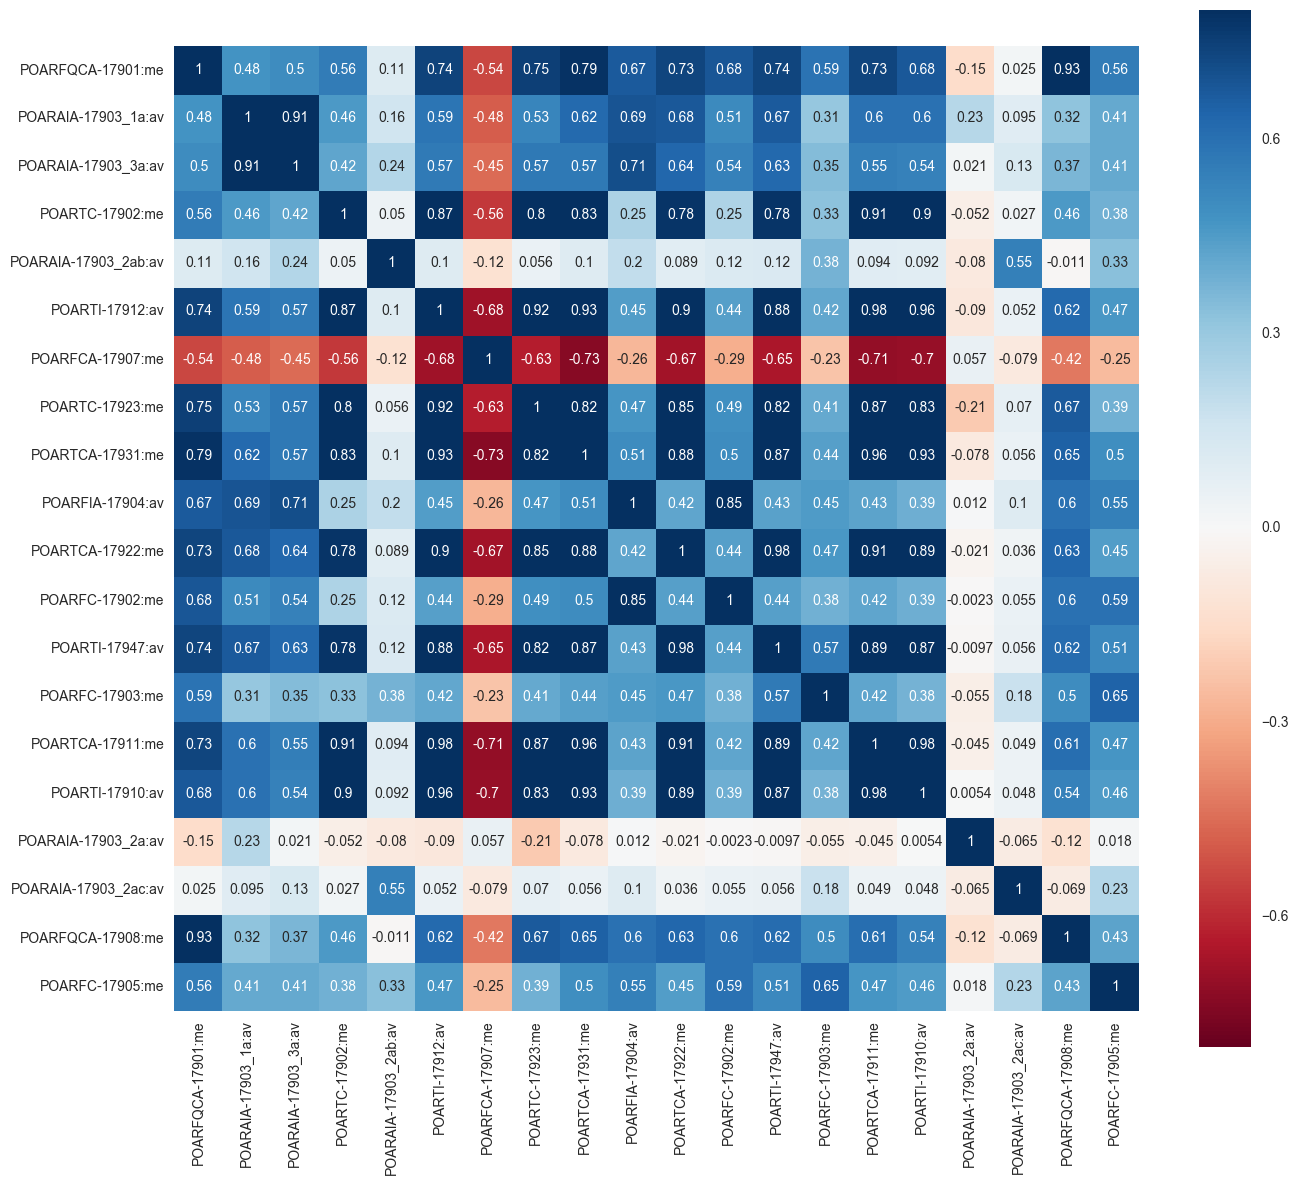

In [14]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corrmat.ix[:20, :20], vmax=.8, square=True, yticklabels=True, annot=True,cmap="RdBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Plotting of rolling correlations
* For 2 variables a rolling correlations is plotted. The sliding window is put to 50 data points.
* This is used to see if correlation stays stable in time.

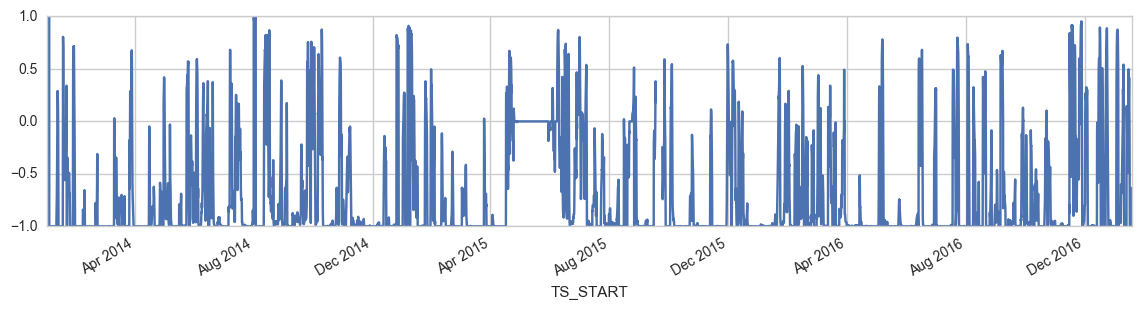

POARFQCA-17901:me - POARAIA-17903_1a:av


In [15]:
correls = df.rolling(window=50).corr()
plt.figure(figsize=(14,3))
correls.loc[:, df.columns[0], df.columns[1]].plot()
plt.show()
print(df.columns[0] + " - " + df.columns[1])

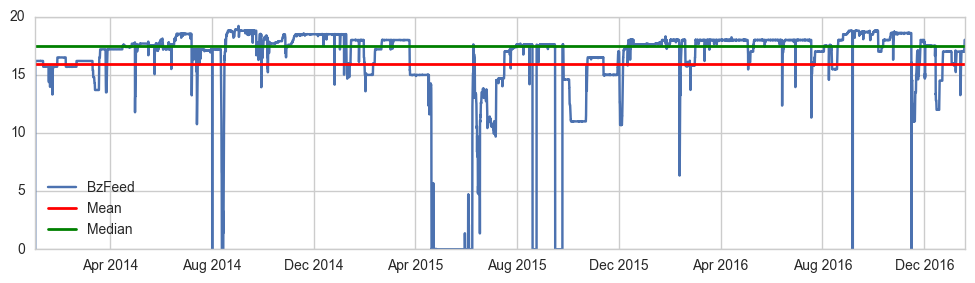

In [16]:
strTagName='BzFeed'
plt.figure(figsize=(12,3))
plt.plot(df.index,df[strTagName],label=strTagName)
plt.axhline(y = df[strTagName].mean(), linewidth=2, color = 'r',label='Mean')
plt.axhline(y = df[strTagName].median(), linewidth=2, color = 'g',label='Median')
plt.legend(loc='lower left')
plt.show()
#py.iplot_mpl(fig, strip_style = True)

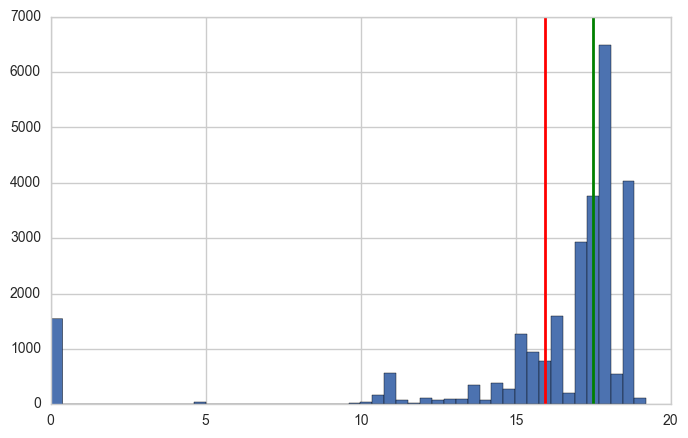

In [17]:
plt.figure(figsize=(8,5))
plt.hist(df[strTagName],50)
plt.axvline(x = df[strTagName].mean(), linewidth=2, color = 'r')
plt.axvline(x = df[strTagName].median(), linewidth=2, color = 'g')
plt.show()